# LAB7 tutorial for Machine Learning <br >Neural NetWork & Pytorch
> The document description are designed by JIa Yanhong in 2022. Oct. 20th
------

## Objective

- Install the pytorch neural network framework for your computer.
- Learn to use pytorch.
- Implement a simple neural network using pytorch
- Complete the LAB assignment.

------

## Introduction 
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of  machine learning and are at the heart of  deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.


![img](images/1hkYlTODpjJgo32DoCOWN5w.png)

Artificial neural networks (ANNs) are comprised of a node layers, containing `an input layer`, `one or more hidden layers`, and `an output layer`. Each node, or artificial neuron, connects to another and has an associated `weight` and `threshold`. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

<img src="images/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="Visual diagram of an input layer, hidden layers, and an output layer of a feedforward neural network " style="zoom:40%;" />

## The role of neural networks in Machine learning
+ Supervise machine learning process 

![Supervise machine learning process ](images/Supervise-machine-learning-process.png)

  In the figure above, the hardest part is how to obtain valid feature vectors. This is a technique called **feature engineering**.

+ **The Importance of Feature Engineering:**

  + Preprocessing and feature extraction determine the upper bound of the model
  + The algorithm and parameter selection approach this upper bound.

+ **Traditional feature extraction methods:**

  <img src="images/image-20221020212446504.png" alt="image-20221020212446504 " style="zoom:60%;" />

+ **Neural networks automatically extract features**
  
  <img src="images/image-20221020212805853.png" alt="image-20221020212805853 " style="zoom:60%;" />




------

## Pytorch
### Install Pytorch
Please refer to **Installing PyTorch on Windows 10.md** for this section:


### Learning pytorch with linear regression
#### Linear regression
Do you remember the general form of linear regression model's prediction?
$$\hat{y}=h_{\theta }(x)=\theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+...+\theta _{n}x_{n}=\theta ^{T}\cdot x$$

<center>
    <img src='images/fit-linreg.svg' style="zoom:100%;"/>
    <br>
    <div style="">
       Fitting a linear regression model to one-dimensional data
    </div>
</center>

Linear regression is a single-layer neural network, We used this simple network to learn how to use pytorch.
<center>
    <img src='images/singleneuron.svg' style="zoom:100%;"/>
    <br>
    <div style="">
        Linear regression is a single-layer neural network 
    </div>
</center>

#### Warm-up: [numpy](https://numpy.org/learn/)
Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

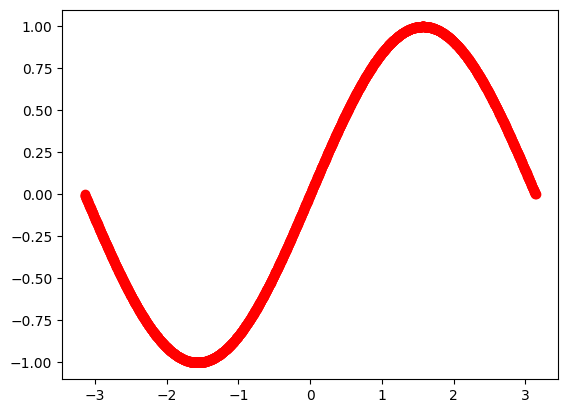

In [32]:
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

plt.scatter(x,y,c = 'r')

In [33]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1524.2688797229682
199 1064.1447880017756
299 744.3259135226482
399 521.8320505207355
499 366.91413621134234
599 258.95931340117966
699 183.67122255158847
799 131.12502176630483
899 94.42433927609166
999 68.7728968674026
1099 50.832112021977856
1199 38.27613791389493
1299 29.483357089784995
1399 23.322278822311322
1499 19.002814412651137
1599 15.972873733552472
1699 13.846409491500753
1799 12.353302948737705
1899 11.304432981212756
1999 10.567309256364092
Result: y = -0.042443832514509075 + 0.8451467097592297 x + 0.007322267377174415 x^2 + -0.09168122453920462 x^3


#### PyTorch: Tensors 
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor.

In [34]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
# device = torch.device("cuda:0")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 121.46126556396484
199 83.65418243408203
299 58.55270004272461
399 41.88126754760742
499 30.805648803710938
599 23.445449829101562
699 18.552696228027344
799 15.299049377441406
899 13.134644508361816
999 11.694289207458496
1099 10.735352516174316
1199 10.096668243408203
1299 9.671100616455078
1399 9.3873872756958
1499 9.198159217834473
1599 9.07188606262207
1699 8.987569808959961
1799 8.931238174438477
1899 8.893582344055176
1999 8.868393898010254
Result: y = -0.0034538698382675648 + 0.8505484461784363 x + 0.0005958508118055761 x^2 + -0.09244956821203232 x^3


#### PyTorch: Tensors and autograd
In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. 

When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If `x` is a Tensor that has `x.requires_grad=True` then `x.grad` is another Tensor holding the gradient of `x` with respect to some scalar value.

In [35]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
# device = torch.device("cuda:0")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)


# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()

    if t % 100 == 99:
        print(t, loss.data.item())

    # Backprop to compute gradients of a, b, c, d with respect to loss
    # grad_y_pred = 2.0 * (y_pred - y)
    # grad_a = grad_y_pred.sum()
    # grad_b = (grad_y_pred * x).sum()
    # grad_c = (grad_y_pred * x ** 2).sum()
    # grad_d = (grad_y_pred * x ** 3).sum()
    loss.backward()

    # Update weights using gradient descent
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    c.data -= learning_rate * c.grad.data
    d.data -= learning_rate * d.grad.data

    a.grad.data.zero_()
    b.grad.data.zero_()
    c.grad.data.zero_()
    d.grad.data.zero_()


print(f'Result: y = {a.data.item()} + {b.data.item()} x + {c.data.item()} x^2 + {d.data.item()} x^3')

99 7037.71630859375
199 4756.6123046875
299 3219.018310546875
399 2181.608154296875
499 1480.9898681640625
599 1007.352783203125
699 686.8339233398438
799 469.7059020996094
899 322.4609680175781
999 222.49893188476562
1099 154.5616912841797
1199 108.33794403076172
1299 76.85246276855469
1399 55.38162612915039
1499 40.723175048828125
1599 30.704315185546875
1699 23.848506927490234
1799 19.15189552307129
1899 15.930720329284668
1999 13.718920707702637
Result: y = 0.058152176439762115 + 0.8145532011985779 x + -0.01003221794962883 x^2 + -0.08732956647872925 x^3


#### Pytorch: [nn module](https://pytorch.org/docs/stable/nn.html)
we use the nn package to implement our polynomial model network


+ Using torch.nn.Sequential

In [36]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 322.2428894042969
199 218.65293884277344
299 149.39892578125
399 103.07051849365234
499 72.05757141113281
599 51.28271484375
699 37.35594940185547
799 28.012802124023438
899 21.739843368530273
999 17.524717330932617
1099 14.689988136291504
1199 12.781927108764648
1299 11.496438980102539
1399 10.629566192626953
1499 10.044459342956543
1599 9.649117469787598
1699 9.381732940673828
1799 9.200703620910645
1899 9.078011512756348
1999 8.994766235351562
Result: y = -0.009349060244858265 + 0.8470401167869568 x + 0.0016128693241626024 x^2 + -0.09195054322481155 x^3


+ Define the class
  
We define our neural network by subclassing `nn.Module`, and initialize the neural network layers in __init__. Every `nn.Module` subclass implements the operations on input data in the `forward()` method.
The `forward()` method is in charge of conducting the **forward propagation**.

In [37]:
from torch import nn
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()       
        self.linear = nn.Linear(3, 1)
        self.flatten = nn.Flatten(0, 1)
#       self.model = torch.nn.Sequential(
#     torch.nn.Linear(3, 1),
#     torch.nn.Flatten(0, 1)
# )

    def forward(self, x):
        y = self.flatten(self.linear(x))
        
        return y

In [38]:


# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 


model = LinearModel()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model.linear



# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1455.2833251953125
199 970.9605102539062
299 649.0453491210938
399 435.0062255859375
499 292.6431579589844
599 197.91835021972656
699 134.86611938476562
799 92.87889099121094
899 64.90675354003906
999 46.26277542114258
1099 33.83030319213867
1199 25.535594940185547
1299 19.998523712158203
1399 16.300209045410156
1499 13.828553199768066
1599 12.1757173538208
1699 11.06968879699707
1799 10.329056739807129
1899 9.83276081085205
1999 9.499954223632812
Result: y = 0.013848154805600643 + 0.834753155708313 x + -0.002389037050306797 x^2 + -0.09020283073186874 x^3


#### PyTorch: optim
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with `torch.no_grad()`. This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The `optim` package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the `nn` package to define our model as before, but we will optimize the model using the `RMSprop` algorithm provided by the `optim` package:

In [39]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
model.requires_grad_()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.RMSprop(params=model.parameters(),lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(),lr=1e-6,momentum=0.9)

for t in range(2000):
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    # Forward pass: compute predicted y by passing x to the model. 
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
   
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())    

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model.
    loss.backward()

    # Update the weights using gradient descent. 
    optimizer.step()


# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1251.3548583984375
199 484.85748291015625
299 249.03456115722656
399 159.39649963378906
499 100.5748062133789
599 58.06550598144531
699 30.66322135925293
799 16.150720596313477
899 10.450578689575195
999 9.063323974609375
1099 8.901419639587402
1199 8.89883804321289
1299 8.907266616821289
1399 8.90886116027832
1499 8.906707763671875
1599 8.90657901763916
1699 8.907417297363281
1799 8.90743350982666
1899 8.907122611999512
1999 8.907137870788574
Result: y = -7.45018382986018e-07 + 0.857240617275238 x + -7.431835911120288e-07 x^2 + -0.09283056110143661 x^3


### Learning pytorch with logistic regression
If we use a single-layer network for classification, this is known as a logistic regression.


 We need to add the sigmoid function to the output of the linear regression.
<center>
    <img src='images/Center.png' style="zoom:100%;"/>
    <br>
    <div style="">
       Perceptron
    </div>
</center>



Let us define the number of epochs and the learning rate we want our model for training. As the data is a binary  classification, we will use **Binary Cross Entropy** as the **loss function** used to optimize the model using an `SGD optimizer`.

<font size=5 color='red'>Please complete this part of the code!!</font>

## Neural Network
### Perceptron-The basic unit of neural network
A simple model of a biological neuron in an artificial neural network is known as Perceptron. it is the primary step to learn Machine Learning and Deep Learning technologies.

we can consider it as a single-layer neural network with four main parameters, i.e., `input values`, `weights and Bias`, `net sum`, and an `activation function`.

![Perceptron in Machine Learning](images/perceptron-in-machine-learning2.png)

- **Input Nodes or Input Layer:**

This is the primary component of Perceptron which accepts the initial data into the system for further processing.

- **Wight and Bias:**

Weight parameter represents the strength of the connection between units.  Bias can be considered as the intercept in a linear equation.

- **Activation Function:**

These are the final and important components that help to determine whether the neuron will fire or not. The activation function of perceptron is `sign function`

### Multilayer Perceptron(MLP)
A neuron is a mathematical model of the behaviour of a single neuron in a biological nervous system.

A single neuron can solve some simple tasks, but the power of neural networks comes when many of them are arranged in layers and connected in a network architecture.

<img src="images/multilayer-perceptron-1.png" alt="multilayer-perceptron-1 " style="zoom:40%;" />


**A Multilayered Perceptron is a Neural Network**. A neural network having more than 3 hidden layers is called a **Deep Neural Network**.

In this lab, Multilayer Perceptron and Neural Network  mean the same thing.

------


### Activation functions

Various activation functions that can be used with Perceptron.

![Perceptron_36.](images/Perceptron_36.jpg)

<font color="red">Neural network without activation functions are simply linear regression model</font>. The activation makes the input capable of learning and performing more complex tasks.

![image-20221023014216170](images/image-20221023014216170.png)

Therefore, when we write the neural network framework, the neurons in each hidden layer are most of the time **followed by an activation function**.

I recommend that you use the relu function as you build your neural network framework.

![image-20221023015025204](images/image-20221023015025204.png)

### Example for MLP
This Example uses dataset digit123.csv , which has 36 columns, and the last column is the dependent variable. We use this dataset to familiarize ourselves with MLP and solve the multi-classification problem.


**Note that the values of the dependent variable are 1,2,3, and label coding is required.**
#### MLP Model 

+ step 1 load datasets

In [40]:
import numpy as np
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 
# ============================ step 1/6 load datasets ============================
df = pd.read_csv("datasets/digit123.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,1
2,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,1,0,1


In [41]:
df[36].value_counts()

36
1    32
2    32
3    32
Name: count, dtype: int64

In [42]:
y = df[36]
y.replace((1, 2, 3),(0, 1, 2),inplace=True)
X = df.drop(36, axis=1)
X.shape

(96, 36)

In [43]:
## Splitting for X and Y variables:
from sklearn.model_selection import train_test_split
## Splitting dataset into 80% Training and 20% Testing Data:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state =0)


In [44]:
import  torch 
#Converting them to tensors as PyTorch works on, we will use the torch.from_numpy() method:
X_train = torch.from_numpy(X_train.values).float()
X_test = torch.from_numpy(X_test.values).float()
y_train = torch.from_numpy(y_train.values).long()
y_test = torch.from_numpy(y_test.values).long()

+ step 2 Define a MLP subclass of nn. Module.

In [45]:
# Define a MLP subclass of nn. Module.
# ============================ step 2/6 define model ============================
import  torch 

class MLP(nn.Module):
    def __init__(self, n_i, n_h, n_o):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(n_i, n_h)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(n_h, n_o)
    def forward(self, input):
        return self.linear2(self.relu(self.linear1(self.flatten(input))))


+ step 3 Create model

In [46]:

num_epochs = 10000
learning_rate = 0.001 
# Create the model
# ============================ step 3/6 Create model ============================
models = MLP(X_train.shape[1],X_train.shape[1]//2,y_train.unique().size()[0])



+ step 4 Loss function

In [47]:
# ============================ step 4/6 Loss function ============================
criterions = torch.nn.CrossEntropyLoss()


+ step 5 The optimizer

In [48]:
# ============================ step 4/6 The optimizer ============================
optimizers = torch.optim.SGD(models.parameters(), lr=learning_rate)

+ step 6 Train the Model

In [49]:
#Train the Model
# ============================ step 5/6 training ============================    
for epoch in range(num_epochs):
    models.train()
    optimizers.zero_grad()
    # Forward pass
    y_pred  = models(X_train)
    # Compute Loss
    loss = criterions(y_pred, y_train)
    # Backward pass
    loss.backward()
    optimizers.step()
    if (epoch+1) % 20 == 0:                                         
        # printing loss values on every 10 epochs to keep track
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 20, loss = 1.0614
epoch: 40, loss = 1.0581
epoch: 60, loss = 1.0547
epoch: 80, loss = 1.0515
epoch: 100, loss = 1.0483
epoch: 120, loss = 1.0451
epoch: 140, loss = 1.0420
epoch: 160, loss = 1.0388
epoch: 180, loss = 1.0357
epoch: 200, loss = 1.0326
epoch: 220, loss = 1.0294
epoch: 240, loss = 1.0263
epoch: 260, loss = 1.0231
epoch: 280, loss = 1.0199
epoch: 300, loss = 1.0167
epoch: 320, loss = 1.0135
epoch: 340, loss = 1.0103
epoch: 360, loss = 1.0071
epoch: 380, loss = 1.0039
epoch: 400, loss = 1.0007
epoch: 420, loss = 0.9975
epoch: 440, loss = 0.9942
epoch: 460, loss = 0.9910
epoch: 480, loss = 0.9878
epoch: 500, loss = 0.9845
epoch: 520, loss = 0.9813
epoch: 540, loss = 0.9780
epoch: 560, loss = 0.9746
epoch: 580, loss = 0.9712
epoch: 600, loss = 0.9679
epoch: 620, loss = 0.9646
epoch: 640, loss = 0.9612
epoch: 660, loss = 0.9578
epoch: 680, loss = 0.9544
epoch: 700, loss = 0.9510
epoch: 720, loss = 0.9476
epoch: 740, loss = 0.9442
epoch: 760, loss = 0.9408
epoch: 780, loss

Here, 
+ when you call `models(X_train)`, you automatically call `models.forward()` to propagate forward.
+  Next, the loss is calculated. When `loss.backward()` is called, it computes the loss gradient with respect to the weights (of the layer). 
+ The weights are then updated by calling `optimizer.step()`. 
+ After this, the weights have to be emptied for the next iteration. So the `zero_grad()` method is called.

The above code prints the loss at each 20th epoch.


+ step 7 Model Performance
  
Let us finally see the model accuracy:

In [50]:
with torch.no_grad():
    logits = models(X_test)
    y_pred = nn.Softmax(dim=1)(logits)
    y_predicted_cls = y_pred.argmax(1)
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9500


In [51]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_cls))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         4
           2       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.96      0.96      0.96        20
weighted avg       0.96      0.95      0.95        20



## LAB Assignment
### Exercise 1 logistic regression (50 points )
This exercise uses dataset digit01.csv , which has 13 columns, and the last column is the dependent variable. 

This part requires you to implement a `logistic regression` using the pytorch framework (defining a logistic regression class that inherits `nn.module`). To test your model, we provide a dataset `digit01.csv` which is in the **datasets folder**. This dataset requires you to divide the training set and the test set by yourself, and it is recommended that 80% of the training set and 20% of the test set be used.

### Exercise 2  Handwriting recognition with MLP(50 points )

Like last week's lab , your task in this section is also about recognizing handwritten digits, but you are required to use MLP to complete the exercise. It is recommended that you define an MLP class, which is a subclass of `nn.module`.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

For this exercise we use the `minist` dataset.